In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions

In [2]:
df = project_functions.load_and_process('FlamesData.csv')
df.head()

,Player,Hand,Pos,GamesPlayed,G,A,P,PlusMinus,PenaltyMins,P/GP,EVG,EVP,PPG,PPP,SHG,SHP,OTG,GWG,Shots
203,Jarome Iginla,R,R,1219.0,525.0,570.0,1095.0,46.0,831.0,0.90,351.0,708.0,161.0,365.0,13.0,22.0,6.0,83.0,3992.0
130,Theo Fleury,R,R,791.0,364.0,466.0,830.0,148.0,1339.0,1.05,229.0,508.0,107.0,281.0,28.0,41.0,5.0,53.0,2685.0
330,Joe Nieuwendyk,L,C,577.0,314.0,302.0,616.0,135.0,330.0,1.07,173.0,369.0,130.0,234.0,11.0,13.0,3.0,43.0,1549.0
387,Gary Roberts,L,L,585.0,257.0,248.0,505.0,225.0,1736.0,0.86,199.0,400.0,51.0,96.0,7.0,9.0,3.0,27.0,1254.0
332,Kent Nilsson,L,C,425.0,229.0,333.0,562.0,-34.0,90.0,1.32,134.0,312.0,79.0,227.0,16.0,23.0,1.0,25.0,1136.0


# What has happend so far
By using the *load_and_process* function the data has undergone some trimming and reorganization. The following columns were deleted because they were deemed irrelevant to the research question:
1. Face off win percentage (FOW%), this only affects one position of player
1. Shot percentage (S%), this the percentage of shots taken that actually lead to goals scored, unreliable measurement
1. Time on the ice per games played (TOI/GP), this is a notoriously unreliable measurement

Players who did not shoot at the net at least 50 times and players who played less than 70 games were deleted. 70 games was chosen because it is approximately the length of one regular season. The players were then organised by goals descending.

Now I am going to explore the data.


I am now going to perform a correlation analysis using the pairwise plot function to see if there are any relationships between some of the variables.

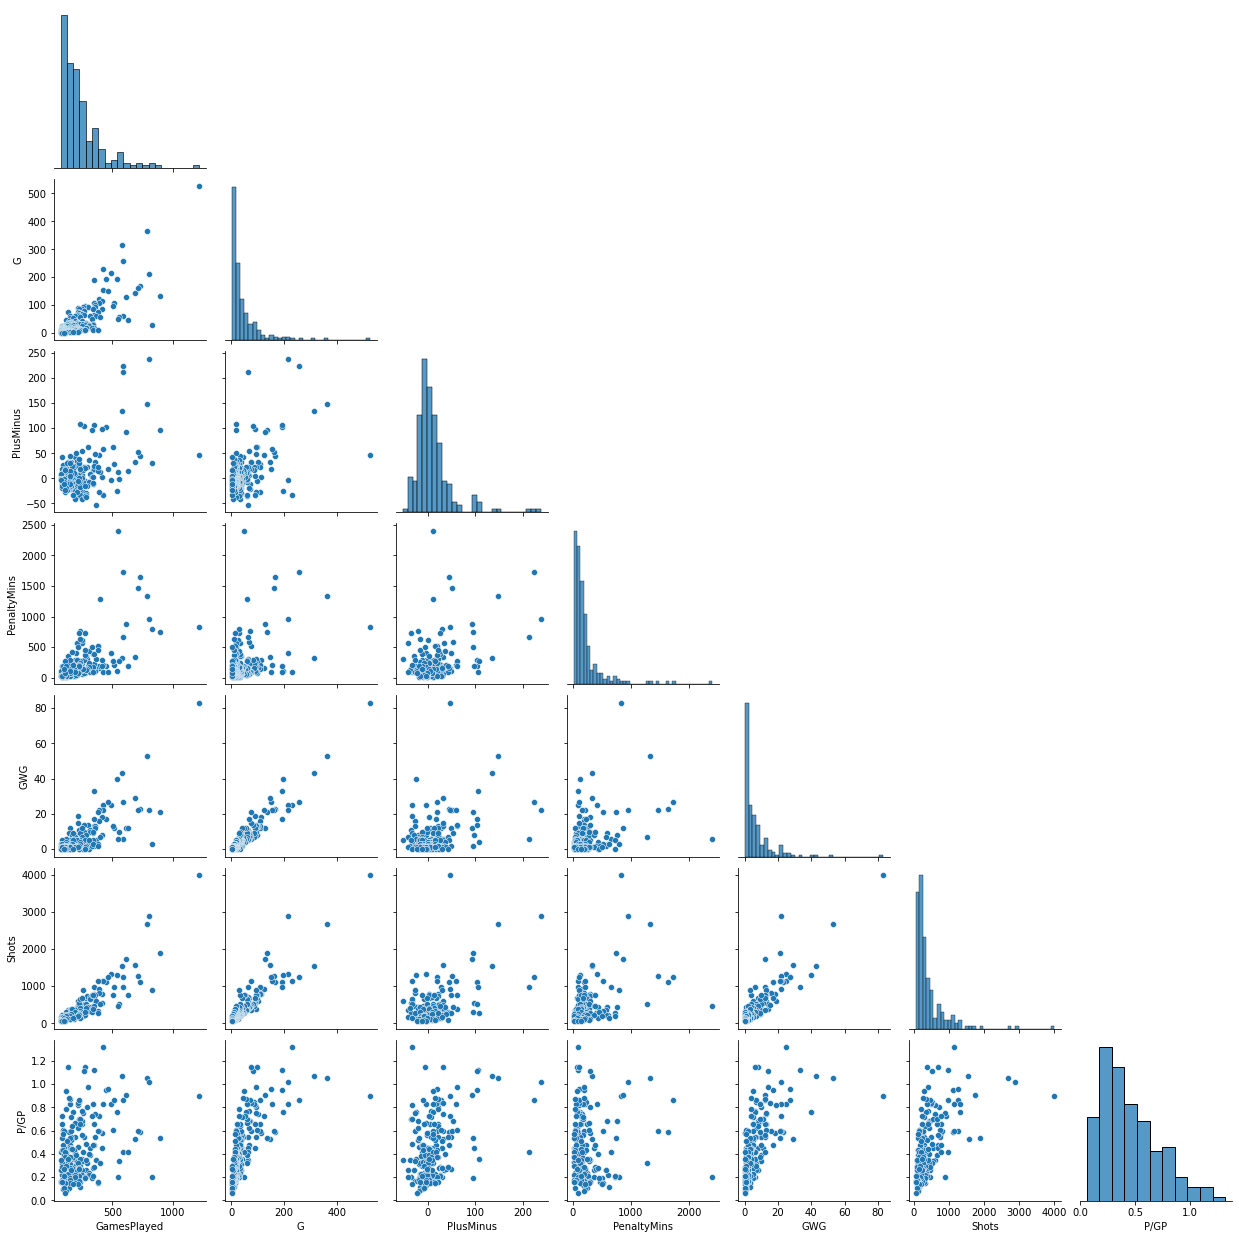

In [19]:
Pplot = sns.pairplot(df[['GamesPlayed', 'G', 'PlusMinus', 'PenaltyMins', 'GWG', 'Shots','P/GP']], corner=True)

The above plot allows us to see that there is correlation between some of the attributes but not all.

In [4]:
total = len(df)
df['Intials'] = ""
for i in range(0,total) :
        intial = ""
        for c in df.iloc[i,0]:
            if c.isupper():
                intial = intial + c
        df.iloc[i,19] = intial

In [5]:
df['GoalsPerGame'] = df['G'] / df['GamesPlayed']

In the above code I am adding a column of the players intials to increase the readability of graphs and adding a goals per game column,

In [6]:
df['GoalsNorm'] = (df['G']-df['G'].min())/(df['G'].max()-df['G'].min())
df['GWGNorm'] = (df['GWG']-df['GWG'].min())/(df['GWG'].max()-df['GWG'].min())
df['PIMNorm'] = ((df['PenaltyMins']-df['PenaltyMins'].min())/(df['PenaltyMins'].max()-df['PenaltyMins'].min()))*-1
df['PluMinNorm'] = (df['PlusMinus']-df['PlusMinus'].min())/(df['PlusMinus'].max()-df['PlusMinus'].min())
df['GPGNorm'] = (df['GoalsPerGame']-df['GoalsPerGame'].min())/(df['GoalsPerGame'].max()-df['GoalsPerGame'].min())

The above code is performing a min/max normalization in the interval 0-1 on specific attributes of interest and saving them in columns.

# top 20 goal scorers
For the next section we are going to play around with different stats and plots from only the top 20 goal scorers of all time. We will be using mostly bar plots here because they make the most sense for the data.

In [7]:
top20Goal = df.head(20)
top20Goal.head()

,Player,Hand,Pos,GamesPlayed,G,A,P,PlusMinus,PenaltyMins,P/GP,...,OTG,GWG,Shots,Intials,GoalsPerGame,GoalsNorm,GWGNorm,PIMNorm,PluMinNorm,GPGNorm
203,Jarome Iginla,R,R,1219.0,525.0,570.0,1095.0,46.0,831.0,0.90,...,6.0,83.0,3992.0,JI,0.430681,1.000000,1.000000,-0.342248,0.339041,0.766865
130,Theo Fleury,R,R,791.0,364.0,466.0,830.0,148.0,1339.0,1.05,...,5.0,53.0,2685.0,TF,0.460177,0.692748,0.638554,-0.554534,0.688356,0.820528
330,Joe Nieuwendyk,L,C,577.0,314.0,302.0,616.0,135.0,330.0,1.07,...,3.0,43.0,1549.0,JN,0.544194,0.597328,0.518072,-0.132888,0.643836,0.973384
387,Gary Roberts,L,L,585.0,257.0,248.0,505.0,225.0,1736.0,0.86,...,3.0,27.0,1254.0,GR,0.439316,0.488550,0.325301,-0.720435,0.952055,0.782575
332,Kent Nilsson,L,C,425.0,229.0,333.0,562.0,-34.0,90.0,1.32,...,1.0,25.0,1136.0,KN,0.538824,0.435115,0.301205,-0.032595,0.065068,0.963613


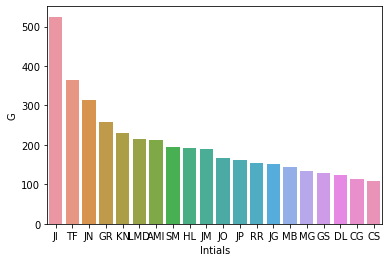

In [8]:
plotT20GG = sns.barplot(x='Intials', y='G', data = top20Goal)

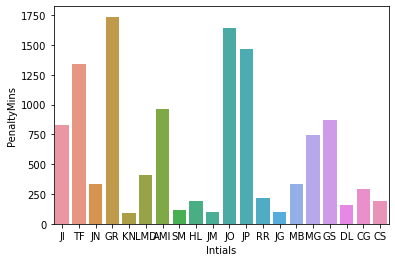

In [9]:
plotT20GPIM = sns.barplot(x='Intials', y='PenaltyMins', data = top20Goal)

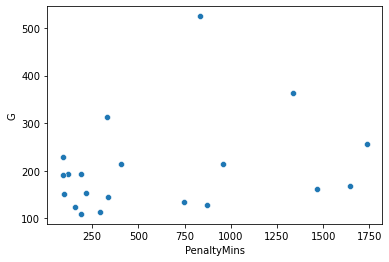

In [10]:
sPlotT20GPIM = sns.scatterplot(x='PenaltyMins', y='G', data = top20Goal)

From the above scatter plot we can see that in the top 20 goal scorers there doesn't seem to be any relationship between penalty mins and goals scored.

<ipython-input-11-73792c8d3355>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20Goal['ShotsPerGoal'] = top20Goal['Shots'] / top20Goal['G']


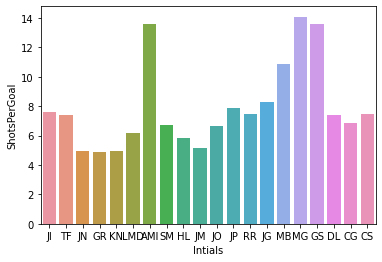

In [11]:
top20Goal['ShotsPerGoal'] = top20Goal['Shots'] / top20Goal['G']
plotT20GSPG = sns.barplot(x='Intials', y='ShotsPerGoal', data = top20Goal)

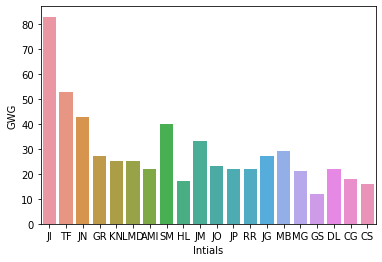

In [12]:
top20GGWG = sns.barplot(x='Intials', y='GWG', data = top20Goal)

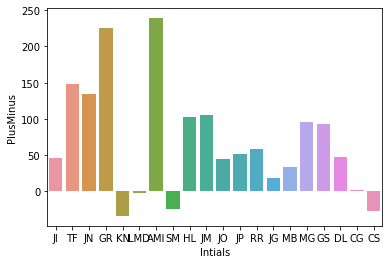

In [13]:
top20GPM = sns.barplot(x='Intials', y='PlusMinus', data = top20Goal)

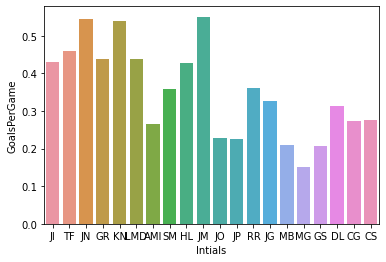

In [14]:
top20GGPG = sns.barplot(x='Intials', y='GoalsPerGame', data = top20Goal)

# Summary

The above graphs are all demonstrating the top 20 goal scorers and their different attributes. From the above graphs it looks like I might make a weighting system and score players based on the weighting system. The final bar graph of player names and their overall score should reveal the best player to have ever played for the flames.

### Further Questions
What type of player is the best for scoring goals, in general? In other words, what type of player is most likely to impact a team positively? By type of player I mean what position do they play and which hand they shoot with.

This question could be something a new player just starting out would consider, or teams while drafting new players to their team. A note is that we are only going to use data from the Calgary Flames, however this analysis could be carried out for the entire league.

To answer this I will create a violin plot of the distribution of goals by position and split by which way they shoot.

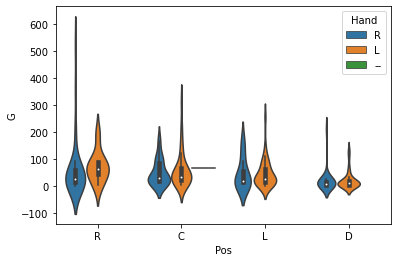

In [24]:
Vplot = sns.violinplot(x='Pos', y='G', hue='Hand', data = df)

We can see from the above plot that some cleaning is needed to answer this. In particular we have outliers and some sort of third of option in "S/C" which makes no sense because it should pretty much be binary. The outliers in this data set are the remarkable players that have scored many goals. To eliminate this we will take out the top 50 goal scorers of all time. Also we will delete any player that doesn't shoot with a "R" or "L". Also the violin plot is doing something weird the goals distributiopn and therefore we will switch to box plots.

In [16]:
df2 = (df[df.Hand != '--']
       .sort_values(by = ['G'])
       .head(-25)
      )

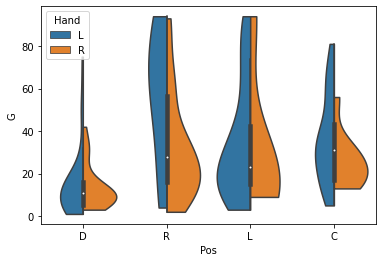

In [23]:
Vplot = sns.violinplot(x='Pos', y='G', hue='Hand', data = df2, cut=0, split=True)

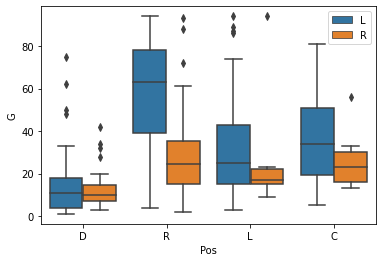

In [25]:
Vplot = sns.boxplot(x='Pos', y='G', hue='Hand', data = df2)
Vplot.legend(loc='upper right')